### Minimum Daily Temperatures Dataset
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 

df=pd.read_csv('MinimumTemp.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
# import package
from kats.consts import TimeSeriesData

df = df.rename(columns={"Date": "time", "Temp": "value"})
df = df[["time", "value"]]
ts_bocpd = TimeSeriesData(df)
ts_bocpd

,time,value
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

# Initialize the detector
detector = BOCPDetector(ts_bocpd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, threshold=0.8 # this is the default choice
)

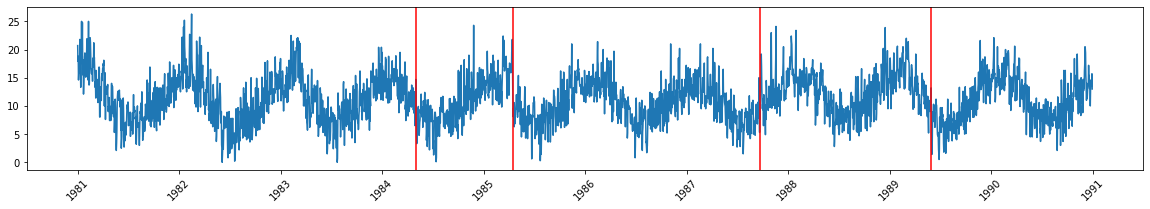

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()